# Optimizing functions using SciPy

It is possible to use existing Python libraries in SciPy in order to find numerically minimizers of functions. The main algorithms are implemented. For a complete list check the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">online documentation</a>. 

Below is a simple example that you can take as a starting point for the practical session. Keep in mind that each of the methods available in scipy.optimize.minimize may require different corresponding inputs. In any case, you hould provide:

- the algorithm to be used in the optimization, using the parameter `method=`

- an objective function of your choice

- if a Gradient based algorithm is used the function computing the gradient may be given to the argument `jac=...`

- if the Hessian matrix is needed, give it as an argument with `hess=...`

- by default, the algorithm does not show you the optimization history. A callback function should be used if you want to recover information about the optimization history. An example of callback function is given below and it is provided to the minimization algorithm via the argument `calback=...`

- you may also provide a tolerance for termination using `tol=...`. This parameter should be tune by looking at the documentation regarding each method.

   1   -2.000000    1.276318    2.099512
   2   -2.330536    1.318264    1.003467
   3   -2.387845    1.317293    0.993816
   4   -3.237652    1.244498    0.868500
   5   -3.401095    1.231258    0.858009
   6   -3.613567    1.219041    0.840226
   7   -3.926039    1.204968    0.810630
   8   -4.481760    1.184696    0.766052
   9   -5.141517    1.162709    0.733750
  10   -5.878616    1.149237    0.696339
  11   -6.372684    1.136292    0.678223
  12   -6.784278    1.127320    0.671177
  13   -7.156977    1.121565    0.659592
  14   -7.681012    1.115449    0.641492
  15   -8.432638    1.104766    0.630446
  16   -9.241489    1.096743    0.613729
  17   -10.009133    1.091896    0.599441
  18   -10.968488    1.082979    0.587801
  19   -11.425885    1.079425    0.584822
  20   -11.866174    1.076774    0.579572
  21   -12.541394    1.073360    0.570952
  22   -14.183941    1.064448    0.563648
  23   -14.697467    1.063372    0.553512
  24   -16.668891    1.055424    0.547018
  25   -

<IPython.core.display.Javascript object>


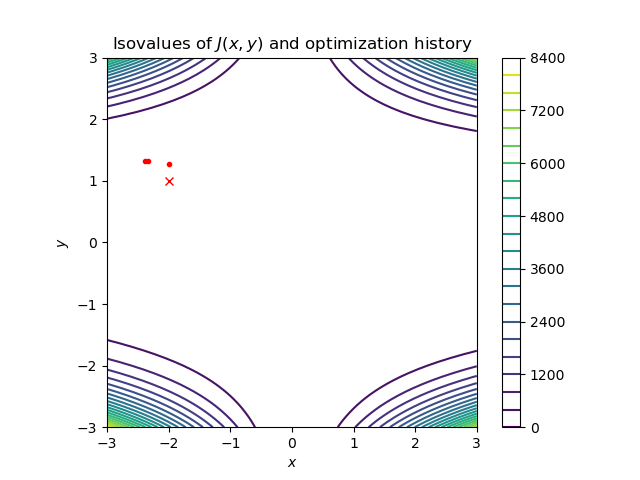

Details regarding the result of the optimization:
      fun: 0.45213135565279916
 hess_inv: array([[1.93676664e+10, 1.24442676e+02],
       [1.24442676e+02, 7.99952726e-07]])
      jac: array([ 3.30743377e-07, -5.05662796e+01])
  message: 'Maximum number of iterations has been exceeded.'
     nfev: 515
      nit: 400
     njev: 515
   status: 1
  success: False
        x: array([-1.24936567e+04,  1.00007931e+00])


In [16]:
import scipy.optimize as scopt
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib notebook

variant = 6
N = 2

def J(x):
    if variant==1:
        return 100*(x[1]-x[0]**2)**2+(1-x[0])**2 #Rosenbrock
    if variant==2:
        return (x[1]**4+x[0]**4)
    if variant==3:
        return (x[1]**2+x[0]**2)**2
    if variant == 4: #NDimensional Rosenbrock
        s = 0
        for i in range(N-1):
            s+= 100*(x[i+1]-x[i]**2)**2+(1-x[i])**2
        return s
    if variant == 5: #|x|^4
        s = 0
        for i in range(N):
            s+= x[i]**2
        s = s**2
        return s 
    if variant == 6: #Beale
        return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 -x[0]+x[0]*x[1]**3)**2
            
        
def GradJ(x):
    if variant==1:
        return np.array([200*(x[1]-x[0]**2)*(-2*x[0])-2*(1-x[0]),200*(x[1]-x[0]**2)])
    if variant==2:
        return np.array([4*x[0]**3,4*x[1]**3])
    if variant==3:
        return np.array([(x[1]**2+x[0]**2)*2*2*x[0],(x[1]**2+x[0]**2)*2*2*x[1]])
    if variant==4:
        v1 = x[1:]
        v0 = x[:-1]
        res = np.zeros(x.shape)
        res[:-1] = res[:-1]-2*(1-v0)-400*(v1-v0**2)*v0
        res[1:]  = res[1:] +200*(v1-v0**2)
        return res
    if variant == 5: #|x|^4
        res = np.array([4*(sum([x[i]**2 for i in range(N)]))*x[k] for k in range(N)])
        return res
    if variant == 6:
        c1 = (1.5 - x[0] + x[0]*x[1])*2*(-1+x[1]) + (2.25 - x[0] + x[0]*x[1]**2)*2*(-1+x[1]**2) + (2.625 -x[0]+x[0]*x[1]**3)*2*(-1+x[1]**3)
        c2 = (1.5 - x[0] + x[0]*x[1])*2*(x[0]) + (2.25 - x[0] + x[0]*x[1]**2)*2*(2*x[0]*x[1]) + (2.625 -x[0]+x[0]*x[1]**3)*2*(3*x[0]*x[1]**2)
        res = np.array([c1,c2])
        return res
def Hess(x):
    if variant ==4:
        H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
        diagonal = np.zeros(x.shape)
        diagonal[0] = 1200*x[0]-400*x[1]+2
        diagonal[-1] = 200
        diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
        H = H + np.diag(diagonal)
        return H
    else:
        pass
Nfeval = 1
xs = []
ys = []
        
def callbackF(Xi):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, Xi[0], Xi[1], J(Xi)))
    xs.append(Xi[0])
    ys.append(Xi[1])
    Nfeval += 1

x0 = np.array([-2,1])    

#list of possible methods
# string = 'CG'
# string = 'BFGS'
#string = 'Nelder-Mead'  # gradient-free
# string = 'Powell'       # gradient-free
string = 'L-BFGS-B'
    
Result = scopt.minimize(J,x0,jac=GradJ,callback=callbackF,method=string,tol=1e-15)    

# plot the optimization history

plt.figure()
xmin=min(-2,x0[0])-1
xmax=max(2,x0[0])+1
ymin=min(-2,x0[1])-1
ymax=max(2,x0[1])+1
aX0=np.linspace(xmin,xmax,100)
aX1=np.linspace(ymin,ymax,100)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,25)#(np.linspace(0,30,10)**2))
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Isovalues of $J(x,y)$ and optimization history')

plt.plot(xs,ys,'.r')
plt.show()

print("Details regarding the result of the optimization:")
print(Result)
